# Data Question 1: An Exploration of UN data

## 3-4. Import required packages

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
# Jupyter magic so we don't have to call plt.show() every time
%matplotlib inline

pd.set_option('display.max_columns', 500)

# Set defaults theme for sns
sns.set()

## 5. Read in dataset 

- Read dataset into notebook as `gdp_df`
- Take a look at the first 10 rows.into notebook as `gdp_df`
- Take a look at the first 10 rows.

In [3]:
# Pandas Dataframe
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

# Quick glance
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


Ok, it looks good.

### Last 5 rows
Look at the last 5 rows. Do you see a problem?

In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


- It looks like we got some bad data at the end of the data frame!
- This is the footer and we do not need them! Let's correct this!

### Redo the `read_csv()` 

Redo the `read_csv()` call to correct this issue - do not modify the original csv file.

In [5]:
# Re-importing and skipping the last 2 rows
gdp_df = pd.read_csv("../data/gdp_per_capita.csv", skipfooter=2, engine="python") # Another option is: gdp_df = gdp_df[:-2]
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


Let's have some quick glance on the summaries to check the dataframe

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   int64  
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 210.4+ KB


## 6. Drop the `Value Footnotes` 
Drop the `Value Footnotes` column, and rename the remaining columns.

In [7]:
# Deleting the "Value Footnotes" column
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

# Renaming the columns
gdp_df.columns = ["Country", "Year", "GDP_Per_Capita"]

In [8]:
display(gdp_df.head())
display(gdp_df.tail())

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


,Country,Year,GDP_Per_Capita
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849
6728,Zimbabwe,1990,2819.549467


## 7. Rows and columns
- How many rows and columns does `gdp_df` have? 
- What are the data types of its columns? 
- If any of the columns are not the expected types, figure out why and fix it.

In [9]:
# Looking at rows and columns
gdp_df.shape

(6729, 3)

In [10]:
# Information about the dataframe
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


## 8. Represented years
- Which years are represented in this dataset? 
- Take a look at the number of observations per year
- What do you notice?

In [11]:
# Years and Nobs per year
count_years = len(gdp_df['Year'].value_counts())

print("Years represented?", count_years)
display(gdp_df['Year'].value_counts().sort_index())

Years represented? 29


1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

We notice that the years are not equally represented

## 9. How many countries are represented in this dataset?
- Which countries are least represented in the dataset? 
- Why do you think these countries have so few observations?

In [12]:
# Countries and Nobs per countries
count_countries = len(gdp_df['Country'].value_counts())

print("How many countries are represented? {}".format(count_countries))
display(gdp_df['Country'].value_counts().sort_values())

How many countries are represented? 243


Djibouti                      1
South Sudan                   8
Turks and Caicos Islands      8
Sint Maarten (Dutch part)     9
Nauru                        12
                             ..
Jamaica                      29
Malaysia                     29
Romania                      29
Zambia                       29
Cameroon                     29
Name: Country, Length: 243, dtype: int64

It looks like these countries are very small countries and might have not have the required resources to run the statistical studies of their GDP multiple times...

## 10. Subsetting `gdp_df` to just the year 2014
Create a new dataframe by subsetting `gdp_df` to just the year 2014: `gdp_2014`

In [13]:
# Subsetting
gdp_2014 = gdp_df[gdp_df["Year"] == 2014]

# Quick glance
display(gdp_2014.head())

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


## 11. Summary statistics for GDP per capita in 2014
Use `.describe()` to find the summary statistics for GDP per capita in 2014

In [14]:
gdp_2014['GDP_Per_Capita'].describe()

count       240.000000
mean      18034.303556
std       19320.930599
min         672.681648
25%        4301.187365
50%       11868.067810
75%       24388.408410
max      130439.106674
Name: GDP_Per_Capita, dtype: float64

## 12. Create a histogram of GDP Per Capita numbers for 2014
- You may wish to adjust the number of bins for your histogram
- How would you describe the shape of the distribution?

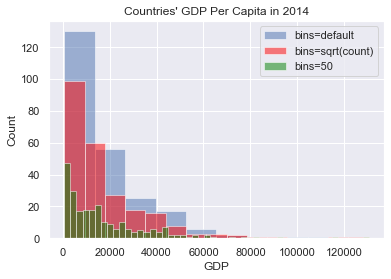

In [15]:
# Histogram
plt.hist(x=gdp_2014["GDP_Per_Capita"], alpha=0.5)
plt.hist(x=gdp_2014["GDP_Per_Capita"], bins=np.int(np.sqrt(gdp_2014["GDP_Per_Capita"].shape[0])), color='red', alpha=0.5)
plt.hist(x=gdp_2014["GDP_Per_Capita"], bins=50, color='green', alpha=0.5)
plt.legend(['bins=default', 'bins=sqrt(count)','bins=50'])

# Settings
plt.title("Countries' GDP Per Capita in 2014");
plt.xlabel("GDP")
plt.ylabel("Count");

This distribution is right-skewed. There is a lot of countries with low GDP and few countries with high GDP.

## 13. Top 5 countries and bottom 5 countries
Find the top 5 countries and bottom 5 countries by GDP per capita in 2014

In [16]:
# Top 5 countries
gdp_2014.nlargest(5, "GDP_Per_Capita")

,Country,Year,GDP_Per_Capita
3639,"Macao SAR, China",2014,130439.106674
5003,Qatar,2014,116693.507701
3610,Luxembourg,2014,92349.186429
5316,Singapore,2014,81965.361071
707,Brunei,2014,76448.593329


In [17]:
# Bottom 5 countries
gdp_2014.nsmallest(5, "GDP_Per_Capita")

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804


## 14. Pivot the data for 1990 and 2017

- Now, return to the full dataset, `gdp_df`. 
- Pivot the data for 1990 and 2017 (using the pandas `.pivot_table()` method or another method) so that: 
  - Each row corresponds to a country
  - Each column corresponds to a year
  - And the values in the table give the `GDP_Per_Capita` amount
- Drop any rows that are missing values for either 1990 or 2017
- Save the result to a dataframe named `gdp_pivoted`

In [18]:
gdp_pivoted = gdp_df.pivot_table(
    values = 'GDP_Per_Capita', # values to aggregate
    index = 'Country', # column to group_by and display in pivot_table rows
    columns = ['Year'], # column to group_by and display in pivot_table columns
).dropna() # Drop any rows were there is a NaN

# Only selecting 1990 and 2017 and dropping NaN
gdp_pivoted = gdp_pivoted[[1990, 2017]]
gdp_pivoted

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
...,...,...
Vietnam,1457.594613,6233.485045
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


## 15. Adding `Percent_Change` Column

- Create a new column in `gdp_pivoted` named `Percent_Change`
- This column should contain the percent change in `GDP_Per_Capita` from 1990 to 2017
- Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value

In [19]:
gdp_pivoted['Percent_Change'] = ((gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]) * 100
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972
...,...,...,...
Vietnam,1457.594613,6233.485045,327.655604
World,8966.014072,15527.280228,73.179298
Yemen,3425.707169,2404.422370,-29.812379


## 16. Negative percent change in GDP per capita
How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [20]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].shape[0]

18

## 17. % change in GDP per capita

### Country with highest % change in GDP

In [21]:
# Country with the highest % change in GDP
gdp_pivoted.sort_values('Percent_Change', ascending=False).iloc[0].name

'Equatorial Guinea'

### Line plot of GDP per capita for 1990 to 2017

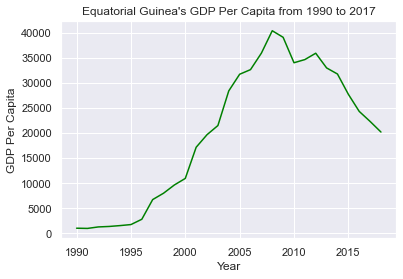

In [22]:
country_highest_gdp = gdp_pivoted.sort_values('Percent_Change', ascending=False).iloc[0].name
data_equatorial = gdp_df[gdp_df['Country'] == country_highest_gdp]

# Plotting
plt.plot(data_equatorial['Year'], data_equatorial['GDP_Per_Capita'], color='green')
plt.title("{}'s GDP Per Capita from 1990 to 2017".format(country_highest_gdp))
plt.xlabel("Year")
plt.ylabel("GDP Per Capita");

### Country with the second highest % change in GDP

In [23]:
# Country with the second highest % change in GDP
gdp_pivoted.sort_values('Percent_Change', ascending=False).iloc[1].name

'China'

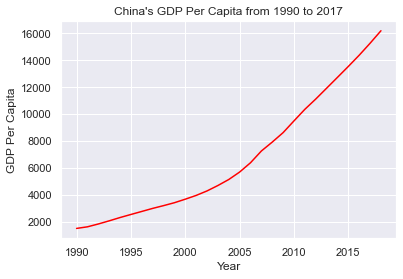

In [24]:
country_second_highest_gdp = gdp_pivoted.sort_values('Percent_Change', ascending=False).iloc[1].name
data_china = gdp_df[gdp_df['Country'] == country_second_highest_gdp]

# Plotting
plt.plot(data_china['Year'], data_china['GDP_Per_Capita'], color='red')
plt.title("{}'s GDP Per Capita from 1990 to 2017".format(country_second_highest_gdp))
plt.xlabel("Year")
plt.ylabel("GDP Per Capita");

### How do the trends in these countries compare?

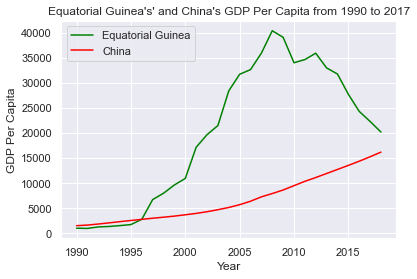

In [25]:
# Plotting together
plt.plot(data_equatorial['Year'], data_equatorial['GDP_Per_Capita'], color='green')
plt.plot(data_china['Year'], data_china['GDP_Per_Capita'], color='red')
plt.legend(['Equatorial Guinea', 'China'])

plt.title("{}'s' and {}'s GDP Per Capita from 1990 to 2017".format(country_highest_gdp, country_second_highest_gdp))
plt.xlabel("Year")
plt.ylabel("GDP Per Capita");

When plotting them together, we can see that they are at about the same level in 2017. There is a large variation between the 2 countries' GDP. For Equatorial Guinea, it was a fast growth followed by a fast decline. For China, it was a steady growth over the years.

The change for Equatorial Guinea was a spiked growth since 1995. But it peaked in 2009 and went downward from there. The country was most likely highly affected by the global financial crisis of 2008 and has not recovered since then

However, the change for China's GDP has been steady from 1990 to 2005 and then rapidly grew since then. It appears that China was not affected by the economic crisis in terms of GDP. It has been climbing and it is still climbing.

## 18. `continents` dataset

- Read in `continents.csv` contained in the data folder into a new dataframe called `continents`
- We will be using this dataframe to add a new column to our dataset

In [26]:
# Pandas Dataframe
continents = pd.read_csv("../data/continents.csv")

# Quick glance
display(continents.head())
display(continents.shape)
display(continents.info())

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


(216, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  216 non-null    object
 1   Country    216 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


None

## 19. Merging datasets

- Merge `gdp_df` and `continents`
- Keep only the countries that appear in both data frames
- Save the result back to `gdp_df`

In [27]:
# Inner join on gdp_df and continents
gdp_df = gdp_df.merge(continents, how="inner", on="Country")
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia
...,...,...,...,...
5329,Zimbabwe,1994,2768.309953,Africa
5330,Zimbabwe,1993,2572.870395,Africa
5331,Zimbabwe,1992,2591.007534,Africa
5332,Zimbabwe,1991,2906.272849,Africa


## 20. Count of countries per continent

- Determine the number of countries per continent
- Create a bar chart showing this

In [28]:
# Getting the number of countries per continent
countries_per_continent = gdp_df.groupby('Continent')[['Country']].count()
display(countries_per_continent)

,Country
Continent,
Africa,1399
Asia,1226
Europe,1243
North America,739
Oceania,379
South America,348


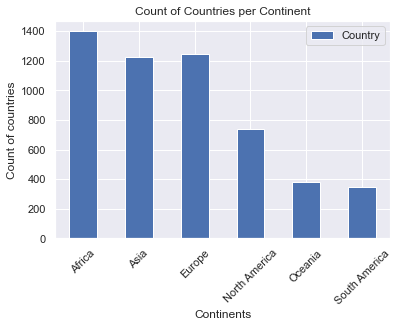

In [29]:
# Creating a bar chart showing this
countries_per_continent.plot(kind='bar', rot=45)

plt.title("Count of Countries per Continent")
plt.xlabel("Continents")
plt.ylabel("Count of countries");

## 21. Boxplot showing GDP per capita in 2014

Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

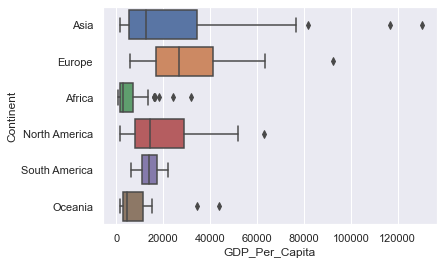

In [30]:
sns.boxplot(data=gdp_df[gdp_df['Year'] == 2014], x="GDP_Per_Capita", y="Continent");

- There is a lot of variation of GDP per Capita per continent.
- Africa, South America, and Oceania has lesser IQR in terms of the variation and are mostly on the lower values
- Asia, Europe, and North America have larger IQR
- There is a lot of outliers for almost any continent except in South America

## 22. `internet_df`

- Read in `internet_use.csv` into a DataFrame called `internet_df`
- You will most likely get an error message when doing this - figure out what is going wrong and fix it
- Take a look at the first and last five rows and make any corrections to your `read_csv()` call to fix this
- Again, do not modify the original datasets

In [31]:
# There are too many junks in the last part of the CSV file. We need to get rid of them
internet_df = pd.read_csv('../data/internet_use.csv', warn_bad_lines=True, error_bad_lines=False)

# Last 180 rows are still bad: Need cleanup
internet_df.drop(internet_df.tail(180).index, inplace=True) # drop last 180 rows
internet_df.tail()

b'Skipping line 4675: expected 4 fields, saw 6\n'


,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [32]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   object 
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), object(2)
memory usage: 175.6+ KB


In [33]:
# Converting Year to integer
internet_df['Year'] = internet_df['Year'].astype('int64')
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 175.6+ KB


## 23. Drop `Value Footnotes` and rename columns

Drop the Value Footnotes column and then rename the columns to `Country`, `Year`, and `Internet_Users_Pct`

In [34]:
# Drop Value Footnotes
internet_df = internet_df.drop(labels=['Value Footnotes'], axis=1)

# Rename columns
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


## 24. About this new dataset

- How many rows and columns does this new dataset have?
- What are the types of its columns?
- Ensure that the `Internet_Users_Pct` column is a numeric data type and fix it if it is not.

In [35]:
# Count of rows and columns
internet_df.shape

(4495, 3)

In [36]:
# Types of columns
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 140.5+ KB


In [37]:
# Fixing Internet_Users_Pct
internet_df['Internet_Users_Pct'] = pd.to_numeric(internet_df['Internet_Users_Pct'])
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 140.5+ KB


## 25. Internet Users Percentage

- What is the first year that has a nonzero internet users percentage reported?
- What is the general trend in internet users percentage over the years
- Pick a visualization that you think illustrates this trend well.

In [38]:
# First year that has a nonzero internet users percentage reported
internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year').iloc[[0]]

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545


**Overall, the general trend of internet users percentage over the years is increasing**

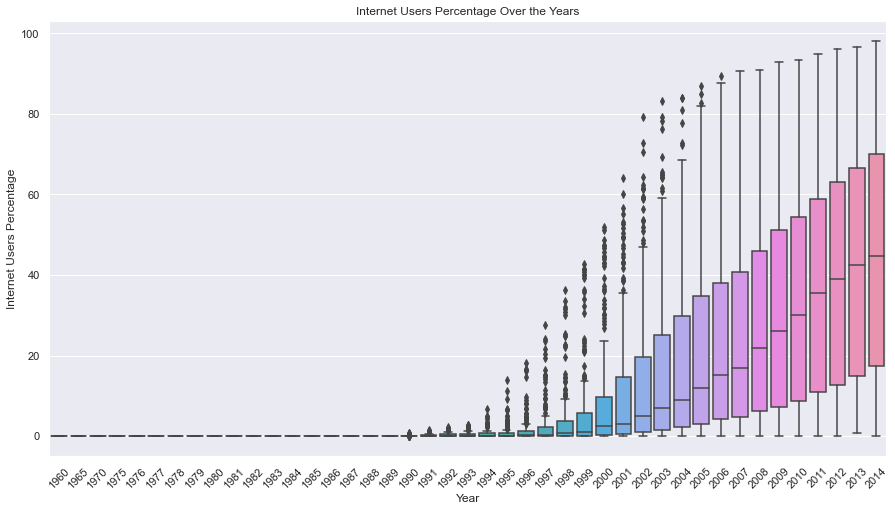

In [39]:
 # General trend in internet users percentage over the years
plt.figure(figsize=(15,8))

sns.boxplot(data=internet_df, x="Year", y="Internet_Users_Pct")

plt.title("Internet Users Percentage Over the Years")
plt.xlabel("Year")
plt.ylabel("Internet Users Percentage")
plt.xticks(rotation=45);

**Using a year-over-year boxplot allows us to see the general trend yet looking at multiple summary statistics at the same time**

## 26. Merge `gdp_df` and `internet_df`

- Merge `gdp_df` and `internet_df` (on `Country` and `Year`) into a single DataFrame named `gdp_and_internet_use`. 
- Keep only countries and years that appear in both tables.

<span class="mark">**Difficult Bonus:** Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.</span>

In [40]:
gdp_and_internet_use = gdp_df.merge(internet_df, on=['Country', 'Year'])

## 27. Checking merge

- Look at the first five rows of your new data frame to confirm it merged correctly. 
- Also, check the last five rows to make sure the data is clean and as expected.

In [41]:
display(gdp_and_internet_use.head())
display(gdp_and_internet_use.tail())

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739
3518,Zimbabwe,1990,2819.549467,Africa,0.000000


## 28. `gdp_and_internet_use_2014`

- Create a new DataFrame, named `gdp_and_internet_use_2014` by extracting data for the year 2014 from `gdp_and_internet_use`.
- What is the mean internet users percentage in 2014?
- How many countries have at least 90% internet users in 2014?

In [42]:
# GDP and Internet Use in 2014 only
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.993216,Europe,60.10
34,Algeria,2014,13557.769757,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20440.540555,North America,64.00


In [43]:
# Mean internet users percentage in 2014
mean_internet_users_pct_2014 = gdp_and_internet_use_2014['Internet_Users_Pct'].mean()
mean_internet_users_pct_2014

44.673536463414635

In [44]:
# Countries that have at least 90% internet users in 2014
countries_internet_2014_90_plus = gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct'] >= 90]\
  .groupby('Country')[['Internet_Users_Pct']].max()\
  .sort_values(by='Internet_Users_Pct', ascending=False)

countries_internet_2014_90_plus

,Internet_Users_Pct
Country,
Iceland,98.16000
Norway,96.30000
Denmark,95.99000
Luxembourg,94.67000
Netherlands,93.17000
Sweden,92.52000
Finland,92.38000
United Kingdom,91.61000
Qatar,91.49000


In [45]:
# How many countries?
countries_internet_2014_90_plus.count()

Internet_Users_Pct    12
dtype: int64

## 29. Countries that had the top 3 largest GDP in 2014

- Find the countries that had the top 3 largest GDP per capita figures for 2014
- Create a seaborn `FacetGrid` showing the change in internet user percentage over time for these 3 countries. 
- Each individual figure in the facet grid will represent a single country. 
- What trends do you notice?

In [46]:
# Top 3 countries per GDP Per Capita in 2014
gdp_and_internet_use_2014.nlargest(3, columns='GDP_Per_Capita')

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186429,Europe,94.67
2765,Singapore,2014,81965.361071,Asia,82.00


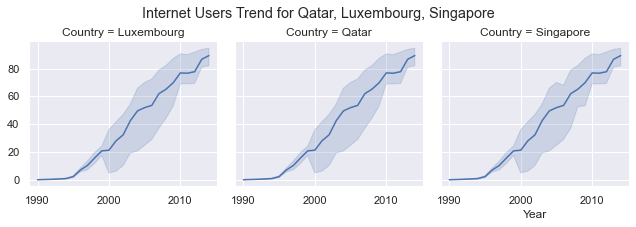

In [47]:
# FacetGrid
data = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Qatar', 'Luxembourg', 'Singapore'])]

g = sns.FacetGrid(data, col='Country')
g.map(sns.lineplot, x=data.Year, y=data.Internet_Users_Pct)

plt.xlabel('Year')
plt.ylabel('Internet Users Percentage')
plt.subplots_adjust(top=0.82)
g.fig.suptitle('Internet Users Trend for Qatar, Luxembourg, Singapore');

The trends for each country are very similar and almost the same

## 30. Internet Use vs GDP per Capita for 2014

Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?

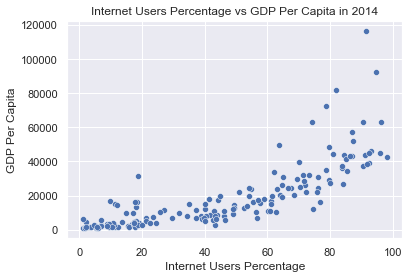

In [48]:
# Scatterplot
sns.scatterplot(data=gdp_and_internet_use_2014, x='Internet_Users_Pct', y='GDP_Per_Capita')

plt.xlabel('Internet Users Percentage')
plt.ylabel('GDP Per Capita')
plt.title('Internet Users Percentage vs GDP Per Capita in 2014');

There is a positive linear correlation between *Internet Users Percentage* and *GDP Per Capita*: As *GDP Per Capita* increases, *Internet Users Percentage* increases as well.

## 31. Pearson's Correlation Coefficient

In [49]:
gdp_and_internet_use_2014.corr()[['Internet_Users_Pct']].loc[['GDP_Per_Capita']]

,Internet_Users_Pct
GDP_Per_Capita,0.787989


It appears that the correlation is 0.79. It means that there is a strong positive linear correlation between the 2 variables.

## 32. Logarithm of GDP per Capita

- Add a column to `gdp_and_internet_use_2014` and calculate the logarithm of GDP per capita
- Find the correlation between the log of GDP per capita and internet users percentage
- How does this compare to the calculation in the previous part?

In [50]:
# Get the log values
log_values = gdp_and_internet_use_2014['GDP_Per_Capita'].apply(np.log)

# Assign the values to the new column: log_GDP_Per_Capita
gdp_and_internet_use_2014 = gdp_and_internet_use_2014.assign(log_GDP_Per_Capita = log_values)

# Peak
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,log_GDP_Per_Capita
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.993216,Europe,60.10,9.278092
34,Algeria,2014,13557.769757,Africa,18.09,9.514715
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20440.540555,North America,64.00,9.925275


In [51]:
# Correlation
gdp_and_internet_use_2014.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct,log_GDP_Per_Capita
Year,NaN,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.787989,0.848299
Internet_Users_Pct,NaN,0.787989,1.000000,0.884432
log_GDP_Per_Capita,NaN,0.848299,0.884432,1.000000


In [52]:
# Pearson's Correlation
gdp_and_internet_use_2014.corr()[['Internet_Users_Pct']].loc[['GDP_Per_Capita', 'log_GDP_Per_Capita']]

,Internet_Users_Pct
GDP_Per_Capita,0.787989
log_GDP_Per_Capita,0.884432


**After applying a log transformation on the `GDP_Per_Capita`, the correlation with `Internet_Users_Pct` has improved quite a bit**

## 33. United States Only

- Filter the original dataset down to just the United States for all available years
- Calculate correlation between internet use and gdp per capita
- Is this meaningful or useful?

In [53]:
# Subsetting gdp_df to USA only
gdp_and_internet_use_usa = gdp_and_internet_use[gdp_and_internet_use['Country'] == 'United States']
gdp_and_internet_use_usa

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3343,United States,2014,52080.792568,North America,87.360000
3344,United States,2013,51208.892428,North America,84.200000
3345,United States,2012,50632.443448,North America,79.300000
3346,United States,2011,49883.113984,North America,69.729461
3347,United States,2010,49479.248679,North America,71.690000
3348,United States,2009,48644.151110,North America,71.000000
3349,United States,2008,50349.715322,North America,74.000000
3350,United States,2007,50897.731238,North America,75.000000
3351,United States,2006,50437.806235,North America,68.931193
3352,United States,2005,49512.926789,North America,67.968053


In [54]:
# Correlation between internet use and gdp per capita
gdp_and_internet_use_usa.corr()[['Internet_Users_Pct']].loc[['GDP_Per_Capita']]

,Internet_Users_Pct
GDP_Per_Capita,0.991618


This is important. It means that the `Internet_Users_Pct` and `GDP_Per_Capita` in USA are strongly correlated and is almost completely linear. However, we should still plot the data to have a visualization of this relationship.

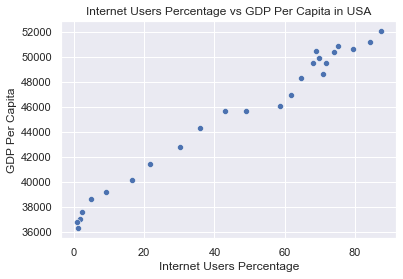

In [55]:
# Scatterplot
sns.scatterplot(data=gdp_and_internet_use_usa, x='Internet_Users_Pct', y='GDP_Per_Capita')

plt.xlabel('Internet Users Percentage')
plt.ylabel('GDP Per Capita')
plt.title('Internet Users Percentage vs GDP Per Capita in USA');

## 26. (Difficult Bonus)

Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. 

Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is “Central African Republic” in the gdp dataframe and “Central African Rep.” in the internet use dataframe.

Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

In [56]:
# Let's re-check the dataframes really quick
display(gdp_df.head())
display(internet_df.head())

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia


,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


Let's check if there are are countries in `gdp_df` that are not in `internet_df`. We can accomplish this with an Anti-Join" *Filter the left table (`gdp_df`) down to only the observations that do not have a match on the right table (`internet_df`)*

In [57]:
# Do a left-join with added _merge column
temp_left_merged = gdp_df.merge(internet_df, on=['Country', 'Year'], how='left', indicator=True, suffixes=("_gdp", "_internet"))
temp_left_merged

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,_merge
0,Afghanistan,2018,1734.723214,Asia,NaN,left_only
1,Afghanistan,2017,1758.465636,Asia,NaN,left_only
2,Afghanistan,2016,1757.023490,Asia,NaN,left_only
3,Afghanistan,2015,1766.593077,Asia,NaN,left_only
4,Afghanistan,2014,1795.735834,Asia,6.390000,both
...,...,...,...,...,...,...
5329,Zimbabwe,1994,2768.309953,Africa,0.001739,both
5330,Zimbabwe,1993,2572.870395,Africa,NaN,left_only
5331,Zimbabwe,1992,2591.007534,Africa,NaN,left_only
5332,Zimbabwe,1991,2906.272849,Africa,NaN,left_only


In [58]:
# Returns only the 'Country' and 'Year' column from temp_merged
not_in_internet_df = temp_left_merged.loc[temp_left_merged['_merge'] == 'left_only', 'Country'] # list of ids

In [59]:
# Returns the difference
merged_df = gdp_df[gdp_df['Country'].isin(not_in_internet_df)]
merged_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia
...,...,...,...,...
5329,Zimbabwe,1994,2768.309953,Africa
5330,Zimbabwe,1993,2572.870395,Africa
5331,Zimbabwe,1992,2591.007534,Africa
5332,Zimbabwe,1991,2906.272849,Africa
